In [203]:
import argparse
import pandas as pd
import h5py
import numpy as np
from molecules.utils import one_hot_array, one_hot_index
from functools import reduce
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import AllChem
from group_selfies import (
    fragment_mols, 
    Group, 
    MolecularGraph, 
    GroupGrammar, 
    group_encoder
)

from rdkit.Chem import rdmolfiles
from rdkit.Chem.Draw import IPythonConsole

import IPython.display # from ... import display
from test_utils import *
from rdkit import RDLogger

# Primer graph

['condRealNVP', 'AutoregressiveRationalQuadraticSpline', 'condMaskedAffineAutoregressive', 'RealNVP', 'MaskedAffineAutoregressive', 'ChEMBL22', 'random']
condRealNVP
AutoregressiveRationalQuadraticSpline
condMaskedAffineAutoregressive
RealNVP
MaskedAffineAutoregressive
ChEMBL22
random
Plotting QED histogram for condRealNVP...
Plotting QED histogram for AutoregressiveRationalQuadraticSpline...
Plotting QED histogram for condMaskedAffineAutoregressive...
Plotting QED histogram for RealNVP...
Plotting QED histogram for MaskedAffineAutoregressive...


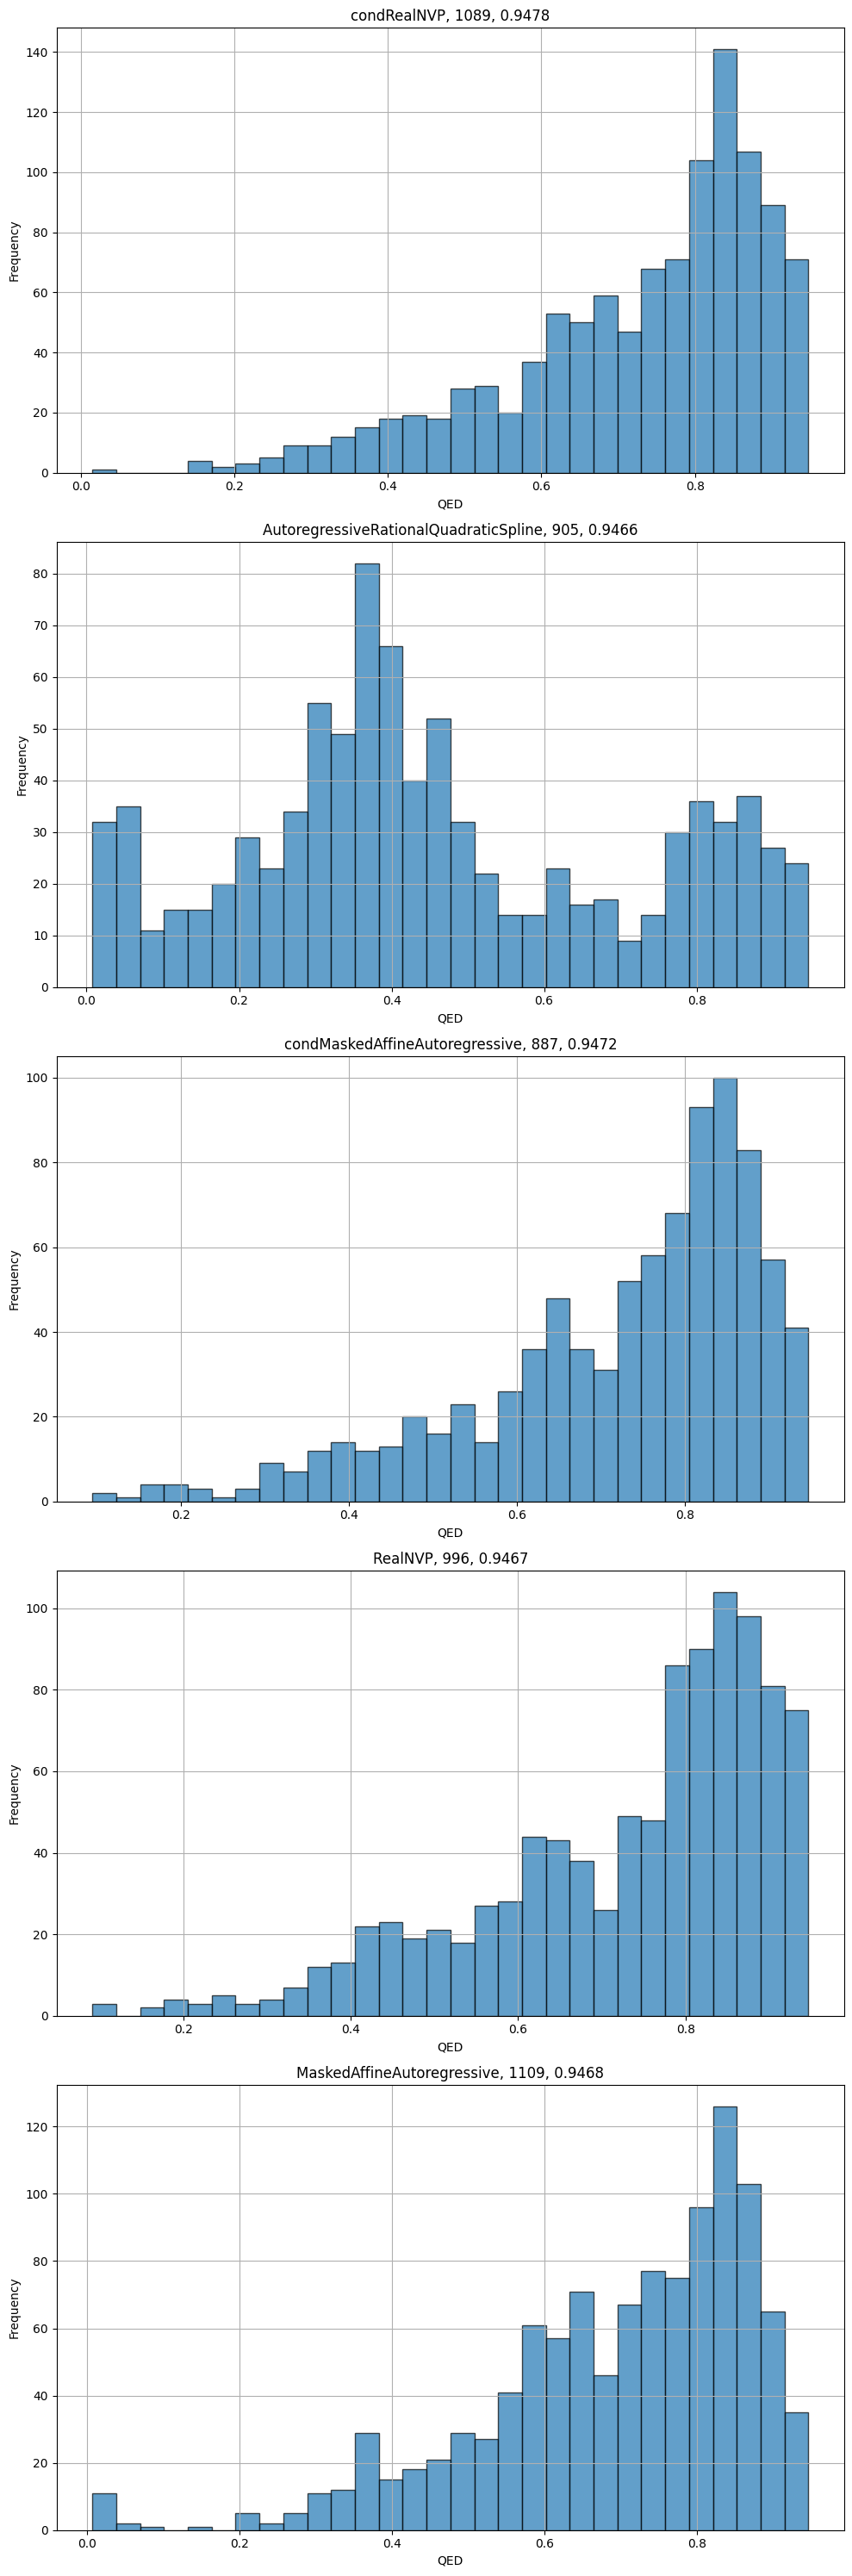

In [199]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Path and extension setup
path = ''
extension = 'csv'
all_csv = glob.glob('*.{}'.format(extension))

# Clean the filenames to get the names of flows
all_flows = [s.replace('.csv', '').replace('1_', '').replace('-4-32', '') for s in all_csv]
print(all_flows)

# Initialize a dictionary to store flow names as keys and their corresponding data as values
flow_data_dict = {}

for flow in all_flows:
    print(flow)
    # Read the CSV file corresponding to the cleaned 'flow' name
    if flow == 'ChEMBL22' or flow == 'random':
        flow_data = pd.read_csv(str(flow) + '.csv')
    else:
        flow_data = pd.read_csv('1_' + str(flow) + '-4-32.csv')
        # Store the flow data in the dictionary with the flow name as the key
        flow_data_dict[flow] = flow_data[flow_data['Origin'] == '1_iter']

# Create a figure with subplots for each histogram in a single column
num_flows = len(flow_data_dict)
fig, axes = plt.subplots(num_flows, 1, figsize=(10, num_flows * 6))  # Adjust the figsize based on the number of plots

# If there is only one subplot, axes is not a list, so we need to handle that case.
if num_flows == 1:
    axes = [axes]

# Plot histograms for QED values of each flow in a single column
for i, (flow_name, flow_data) in enumerate(flow_data_dict.items()):
    print(f"Plotting QED histogram for {flow_name}...")

    # Extract the QED values
    qed_values = flow_data['QED'].dropna()  # Remove any NaN values if present
    
    # Create histogram for each flow
    axes[i].hist(qed_values, bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f"{flow_name}, {len(flow_data['QED'])}, {round(flow_data['QED'].max(), 4)}")
    axes[i].set_xlabel("QED")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True)

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the plot
plt.show()


# Publication graph

Flows: ['ChEMBL22', 'RealNVP', 'MaskedAffineAutoregressive', 'AutoregressiveRationalQuadraticSpline', 'condRealNVP', 'condMaskedAffineAutoregressive']
Processing ChEMBL22...
Processing RealNVP...
Processing MaskedAffineAutoregressive...
Processing AutoregressiveRationalQuadraticSpline...
Processing condRealNVP...
Processing condMaskedAffineAutoregressive...
ChEMBL22 QED min: 0.2335469098782191, QED max: 0.94812320172409


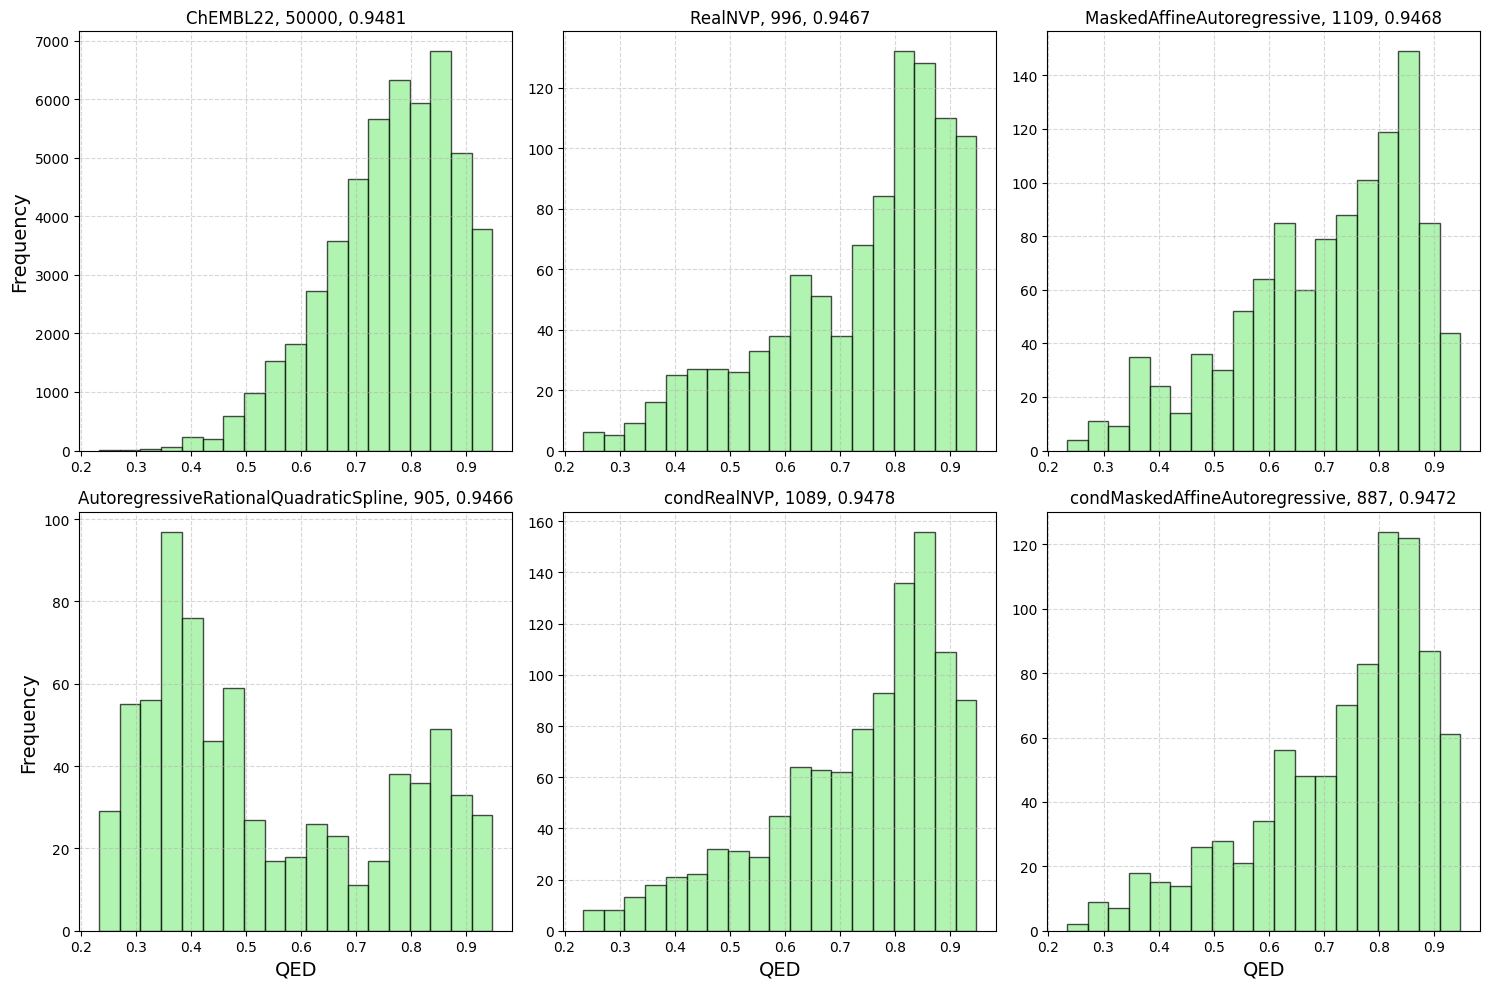

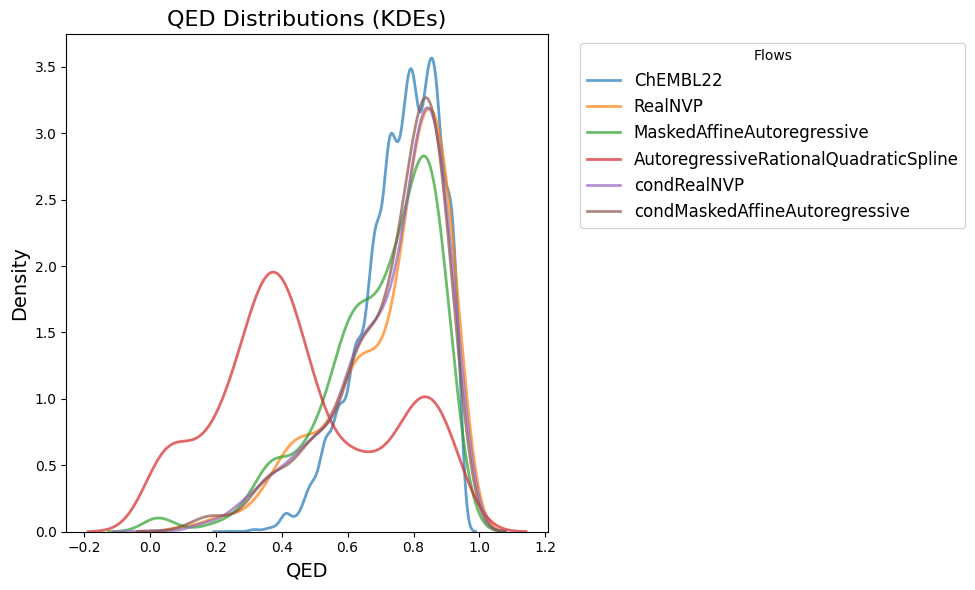

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for KDE
import numpy as np

# Path and extension setup
path = ''
extension = 'csv'
all_csv = glob.glob('*.{}'.format(extension))

# Clean the filenames to get the names of flows
all_flows = ['ChEMBL22', 'RealNVP',  'MaskedAffineAutoregressive', 'AutoregressiveRationalQuadraticSpline', 'condRealNVP', 'condMaskedAffineAutoregressive']#, 'random']

print("Flows:", all_flows)

# Initialize a dictionary to store flow names as keys and their corresponding data as values
flow_data_dict = {}

# Loop over all flows (including ChEMBL22)
for flow in all_flows:
    print(f"Processing {flow}...")
    if flow == 'ChEMBL22' or flow == 'random':  # Special case for ChEMBL22
        flow_data = pd.read_csv(str(flow)+'.csv')  # Make sure the file name matches
        flow_data_dict[flow] = flow_data  # No filtering for ChEMBL22
    else:
        flow_data = pd.read_csv('1_' + str(flow) + '-4-32.csv')
        # Store the flow data in the dictionary with the flow name as the key
        flow_data_dict[flow] = flow_data[flow_data['Origin'] == '1_iter']

# Get QED min and max values from ChEMBL22 for consistent axis
chEMBL22_qed_values = flow_data_dict['ChEMBL22']['QED']
qed_min = chEMBL22_qed_values.min()
qed_max = chEMBL22_qed_values.max()

print(f"ChEMBL22 QED min: {qed_min}, QED max: {qed_max}")

# Plot the histograms in a grid
num_flows = len(flow_data_dict)
columns = 3  # Adjust the number of columns you want in the grid
rows = (num_flows + columns - 1) // columns  # Calculate the number of rows needed

fig, axes = plt.subplots(rows, columns, figsize=(15, rows * 5))  # Adjust size as needed
axes = axes.flatten()  # Flatten axes array for easy indexing

# Define bin edges based on the min and max QED values from ChEMBL22
num_bins = 20  # You can adjust this number based on the granularity you want
bins = np.linspace(qed_min, qed_max, num_bins)

# Loop over all flows and plot their histograms in the grid
for i, (flow_name, flow_data) in enumerate(flow_data_dict.items()):
    qed_values = flow_data['QED'].dropna()

    #axes[i].hist(qed_values, bins=bins, alpha=0.7, edgecolor='black')
    axes[i].hist(qed_values, bins=bins, alpha=0.7, edgecolor='black', color='lightgreen')
    axes[i].grid(True, linestyle='--', alpha=0.5)
    axes[i].set_title(f"{flow_name}, {len(flow_data['QED'])}, {round(flow_data['QED'].max(), 4)}", fontsize=12)
    axes[i].set_xlabel("QED", fontsize=14)
    if i == 0 or i == 1 or i == 2:
        axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency", fontsize=14)
    if i == 1 or i == 2 or i == 4 or i == 5:
        axes[i].set_ylabel("")
    axes[i].grid(True)

# Hide any unused subplots if there are fewer flows than the number of axes
for i in range(num_flows, len(axes)):
    axes[i].axis('off')

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.savefig('qed_histograms_plot_publication.png', dpi=600, bbox_inches='tight')

# Show the histogram grid plot
plt.show()

# Create a new figure for KDEs
plt.figure(figsize=(10, 6))

# Loop over all flows and plot their KDEs on the same plot
for flow_name, flow_data in flow_data_dict.items():
    qed_values = flow_data['QED'].dropna()

    # Use a custom color palette for better distinction between the KDEs
    sns.kdeplot(qed_values, label=f'{flow_name}', fill=False, alpha=0.7, linewidth=2)

# Add labels and title to the KDE plot
plt.title('QED Distributions (KDEs)', fontsize=16)
plt.xlabel("QED", fontsize=14)
plt.ylabel("Density", fontsize=14)

# Show the legend
plt.legend(title="Flows", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Show the KDE plot
plt.tight_layout()

# Save the plot with high dpi for publication quality

# Show the KDE plot
plt.savefig('qed_kde_plot_publication.png', dpi=600, bbox_inches='tight')
plt.show()


# Heavy Atoms

In [19]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for KDE
import numpy as np
import rdkit.Chem.Lipinski as Lipinski

# Path and extension setup
path = ''
extension = 'csv'
all_csv = glob.glob('*.{}'.format(extension))

# Clean the filenames to get the names of flows
all_flows = ['ChEMBL22', 'RealNVP',  'MaskedAffineAutoregressive', 'AutoregressiveRationalQuadraticSpline', 'condRealNVP', 'condMaskedAffineAutoregressive', 'random']

print("Flows:", all_flows)

# Initialize a dictionary to store flow names as keys and their corresponding data as values
flow_data_dict = {}

# Loop over all flows (including ChEMBL22)
for flow in all_flows:
    print(f"Processing {flow}...")
    if flow == 'ChEMBL22' or flow == 'random':  # Special case for ChEMBL22
        flow_data = pd.read_csv(str(flow)+'.csv')  # Make sure the file name matches
        flow_data_dict[flow] = flow_data  # No filtering for ChEMBL22
    else:
        flow_data = pd.read_csv('1_' + str(flow) + '-4-32.csv')
        # Store the flow data in the dictionary with the flow name as the key
        flow_data_dict[flow] = flow_data[flow_data['Origin'] == '1_iter']
    for index, row in flow_data_dict[flow].iterrows():
        try:
            mol = Chem.MolFromSmiles(row['Original_SMILES'])#+'OP(C)(=O)F')
            Heavy_atoms = Lipinski.HeavyAtomCount(mol)
        except:
            Heavy_atoms = np.nan
        
        flow_data_dict[flow].at[index, "Heavy_atoms"] = Heavy_atoms

Flows: ['ChEMBL22', 'RealNVP', 'MaskedAffineAutoregressive', 'AutoregressiveRationalQuadraticSpline', 'condRealNVP', 'condMaskedAffineAutoregressive', 'random']
Processing ChEMBL22...


[23:02:30] Explicit valence for atom # 14 N, 4, is greater than permitted


Processing RealNVP...


/tmp/ipykernel_1694791/250073722.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_data_dict[flow].at[index, "Heavy_atoms"] = Heavy_atoms


Processing MaskedAffineAutoregressive...


/tmp/ipykernel_1694791/250073722.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_data_dict[flow].at[index, "Heavy_atoms"] = Heavy_atoms


Processing AutoregressiveRationalQuadraticSpline...


/tmp/ipykernel_1694791/250073722.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_data_dict[flow].at[index, "Heavy_atoms"] = Heavy_atoms


Processing condRealNVP...


/tmp/ipykernel_1694791/250073722.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_data_dict[flow].at[index, "Heavy_atoms"] = Heavy_atoms


Processing condMaskedAffineAutoregressive...


/tmp/ipykernel_1694791/250073722.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_data_dict[flow].at[index, "Heavy_atoms"] = Heavy_atoms


Processing random...


[23:02:37] WARNING: not removing hydrogen atom without neighbors


In [20]:
flow_data_dict['random']

,Original_SMILES,QED,SA_score,Origin,Heavy_atoms
0,CCCl,0.371986,2.381334,1st_iter,3.0
1,SBr,0.448418,4.954876,1st_iter,2.0
2,O,0.327748,5.868477,1st_iter,1.0
3,CO,0.385284,2.701045,1st_iter,2.0
4,CNN,0.273315,2.973188,1st_iter,3.0
...,...,...,...,...,...
747,CNNNOOOO,0.201628,4.843223,1st_iter,8.0
748,CCCCCCCCCCC(=C(NC)NCCCCCCCCCCCCCCCCCCCCC)C,0.088778,2.416139,1st_iter,37.0
749,c1c=I1I,0.589846,7.833565,1st_iter,4.0
750,C CCCCCCCCCCCCCCCCHH)CCCC))))CHHH))))))HH])))...,0.359785,7.328415,1st_iter,1.0


ChEMBL22 Heavy_atoms min: 7.0, Heavy_atoms max: 27.0


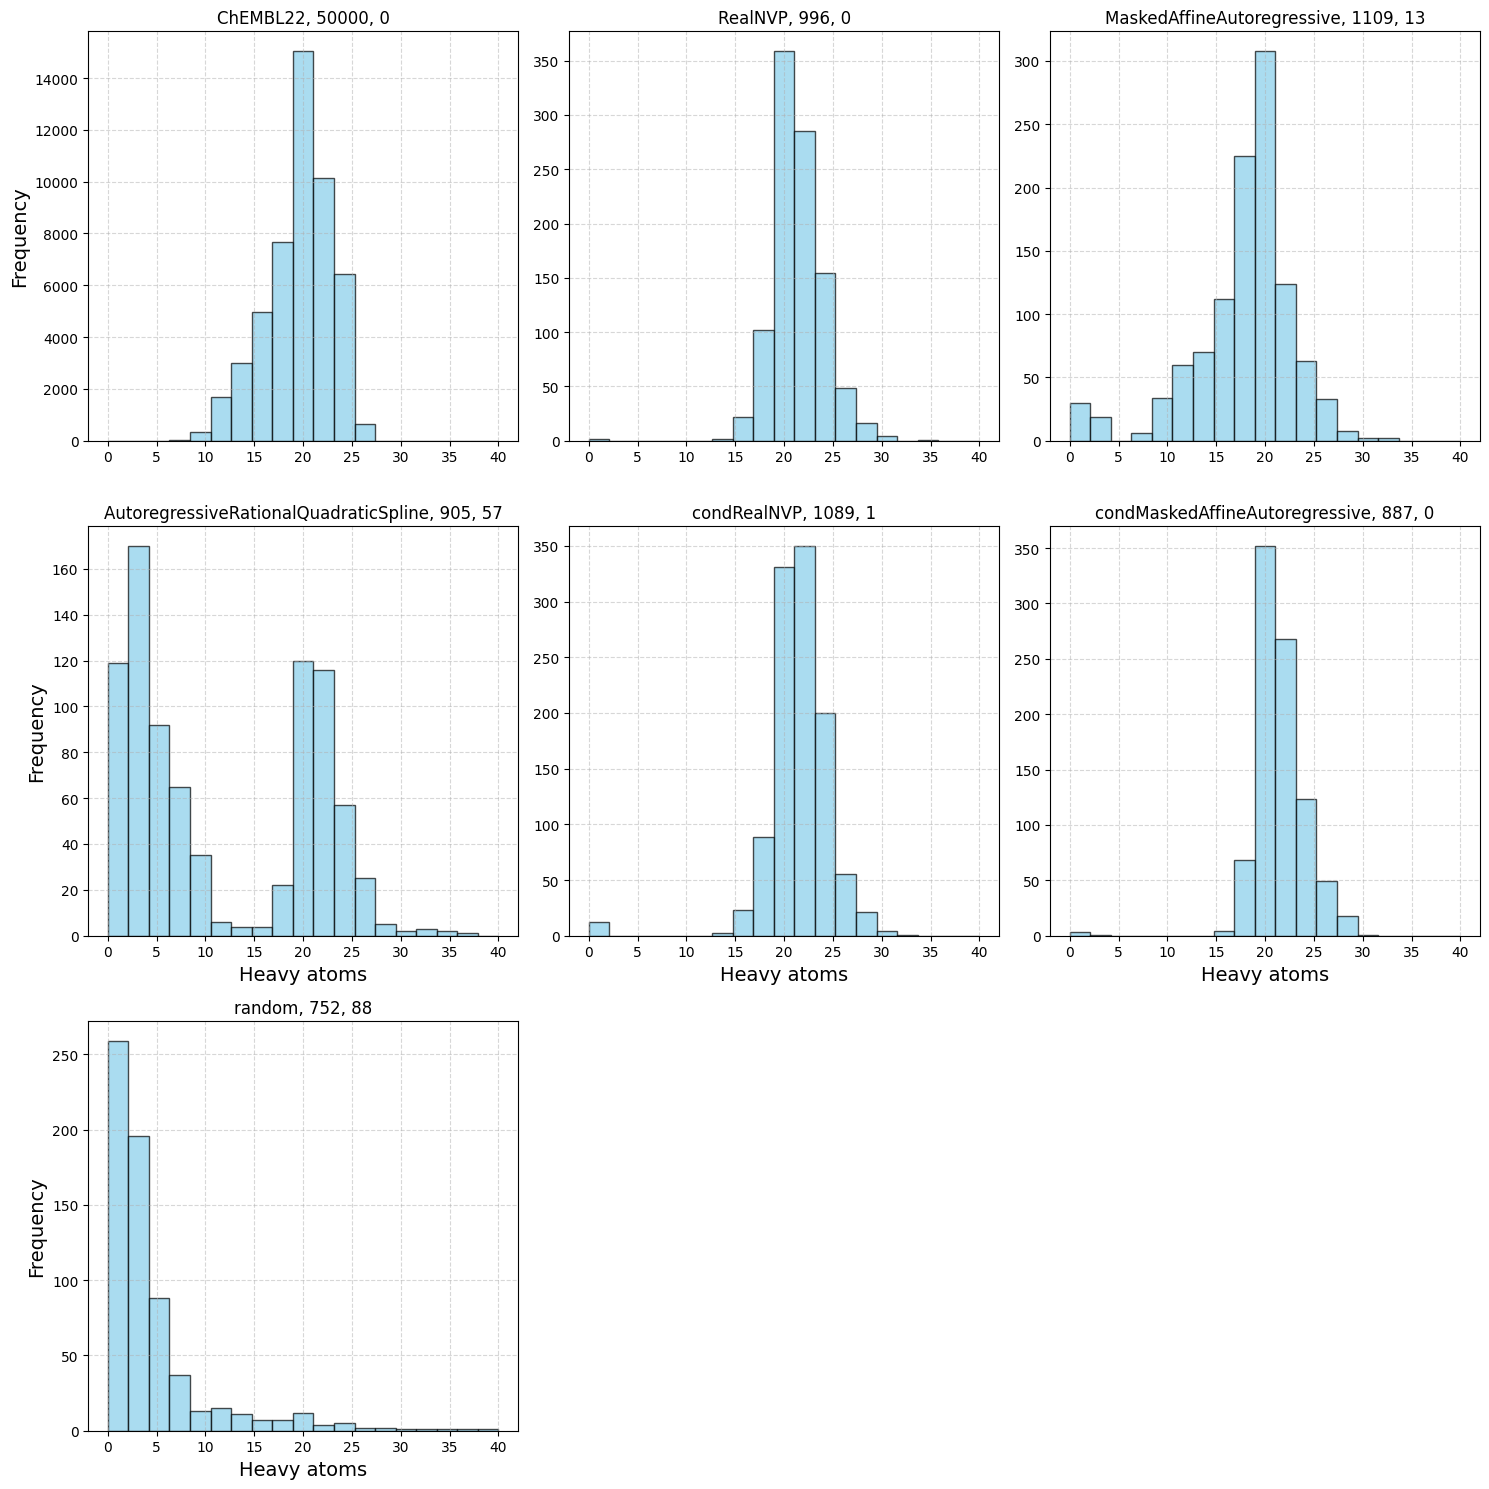

In [22]:
# Get Heavy_atoms min and max values from ChEMBL22 for consistent axis
chEMBL22_Heavy_atoms_values = flow_data_dict['ChEMBL22']['Heavy_atoms']
Heavy_atoms_min = chEMBL22_Heavy_atoms_values.min()
Heavy_atoms_max = chEMBL22_Heavy_atoms_values.max()

print(f"ChEMBL22 Heavy_atoms min: {Heavy_atoms_min}, Heavy_atoms max: {Heavy_atoms_max}")

# Plot the histograms in a grid
num_flows = len(flow_data_dict)
columns = 3  # Adjust the number of columns you want in the grid
rows = (num_flows + columns - 1) // columns  # Calculate the number of rows needed

fig, axes = plt.subplots(rows, columns, figsize=(15, rows * 5))  # Adjust size as needed
axes = axes.flatten()  # Flatten axes array for easy indexing

# Define bin edges based on the min and max Heavy_atoms values from ChEMBL22
num_bins = 20  # You can adjust this number based on the granularity you want
#bins = np.linspace(Heavy_atoms_min, Heavy_atoms_max, num_bins)
bins = np.linspace(0, 40, num_bins)

# Loop over all flows and plot their histograms in the grid
for i, (flow_name, flow_data) in enumerate(flow_data_dict.items()):
    Heavy_atoms_values = flow_data['Heavy_atoms'].dropna()

    axes[i].hist(Heavy_atoms_values, bins=bins, alpha=0.7, edgecolor='black', color='skyblue')
    axes[i].grid(True, linestyle='--', alpha=0.5)
    axes[i].set_title(f"{flow_name}, {len(flow_data['Heavy_atoms'])}, {(flow_data['Heavy_atoms'].dropna() > 40).sum()}", fontsize=12)
    axes[i].set_xlabel("Heavy atoms", fontsize=14)
    if i == 0 or i == 1 or i == 2:
        axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency", fontsize=14)
    if i == 1 or i == 2 or i == 4 or i == 5:
        axes[i].set_ylabel("")
    axes[i].grid(True)

# Hide any unused subplots if there are fewer flows than the number of axes
for i in range(num_flows, len(axes)):
    axes[i].axis('off')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the histogram grid plot
# Save the plot with high dpi for publication quality
# plt.savefig('Heavy_atoms_histograms_kde_plot_publication.png', dpi=300, bbox_inches='tight')
plt.show()


In [23]:
print('QED')
for i, (flow_name, flow_data) in enumerate(flow_data_dict.items()):
    print(flow_name, flow_data['QED'].dropna().max())


print('')
print('SA_score')
for i, (flow_name, flow_data) in enumerate(flow_data_dict.items()):
    print(flow_name, flow_data['Heavy_atoms'].dropna().mean())

QED
ChEMBL22 0.94812320172409
RealNVP 0.9466612518968543
MaskedAffineAutoregressive 0.9467570437657375
AutoregressiveRationalQuadraticSpline 0.9465945009104892
condRealNVP 0.9478163604556784
condMaskedAffineAutoregressive 0.9472075461389796
random 0.8851857689826693

SA_score
ChEMBL22 19.59047180943619
RealNVP 21.542168674698797
MaskedAffineAutoregressive 18.97926059513075
AutoregressiveRationalQuadraticSpline 18.27403314917127
condRealNVP 21.80716253443526
condMaskedAffineAutoregressive 21.640360766629087
random 17.716378162450066


# Number of aromatic rings

In [22]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for KDE
import numpy as np
import rdkit.Chem.Lipinski as Lipinski
import rdkit.Chem.Descriptors


# Path and extension setup
path = ''
extension = 'csv'
all_csv = glob.glob('*.{}'.format(extension))

# Clean the filenames to get the names of flows
all_flows = ['ChEMBL22', 'RealNVP',  'MaskedAffineAutoregressive', 'AutoregressiveRationalQuadraticSpline', 'condRealNVP', 'condMaskedAffineAutoregressive', 'random']

print("Flows:", all_flows)

# Initialize a dictionary to store flow names as keys and their corresponding data as values
flow_data_dict = {}

# Loop over all flows (including ChEMBL22)
for flow in all_flows:
    print(f"Processing {flow}...")
    if flow == 'ChEMBL22' or flow == 'random':  # Special case for ChEMBL22
        flow_data = pd.read_csv(str(flow)+'.csv')  # Make sure the file name matches
        flow_data_dict[flow] = flow_data  # No filtering for ChEMBL22
    else:
        flow_data = pd.read_csv('1_' + str(flow) + '-4-32.csv')
        # Store the flow data in the dictionary with the flow name as the key
        flow_data_dict[flow] = flow_data[flow_data['Origin'] == '1_iter']
    for index, row in flow_data_dict[flow].iterrows():
        try:
            mol = Chem.MolFromSmiles(row['Original_SMILES'])#+'OP(C)(=O)F')
            aromatic = rdkit.Chem.Descriptors.NumAromaticRings(mol)
        except:
            aromatic = np.nan
        
        flow_data_dict[flow].at[index, "aromatic"] = aromatic

Flows: ['ChEMBL22', 'RealNVP', 'MaskedAffineAutoregressive', 'AutoregressiveRationalQuadraticSpline', 'condRealNVP', 'condMaskedAffineAutoregressive', 'random']
Processing ChEMBL22...


[14:42:35] Explicit valence for atom # 14 N, 4, is greater than permitted


Processing RealNVP...


/tmp/ipykernel_1906336/2559858386.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_data_dict[flow].at[index, "aromatic"] = aromatic


Processing MaskedAffineAutoregressive...


/tmp/ipykernel_1906336/2559858386.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_data_dict[flow].at[index, "aromatic"] = aromatic


Processing AutoregressiveRationalQuadraticSpline...


/tmp/ipykernel_1906336/2559858386.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_data_dict[flow].at[index, "aromatic"] = aromatic


Processing condRealNVP...


/tmp/ipykernel_1906336/2559858386.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_data_dict[flow].at[index, "aromatic"] = aromatic


Processing condMaskedAffineAutoregressive...


/tmp/ipykernel_1906336/2559858386.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_data_dict[flow].at[index, "aromatic"] = aromatic


Processing random...


[14:42:41] WARNING: not removing hydrogen atom without neighbors


In [23]:
flow_data_dict['random']

,Original_SMILES,QED,SA_score,Origin,aromatic
0,CCCl,0.371986,2.381334,1st_iter,0.0
1,SBr,0.448418,4.954876,1st_iter,0.0
2,O,0.327748,5.868477,1st_iter,0.0
3,CO,0.385284,2.701045,1st_iter,0.0
4,CNN,0.273315,2.973188,1st_iter,0.0
...,...,...,...,...,...
747,CNNNOOOO,0.201628,4.843223,1st_iter,0.0
748,CCCCCCCCCCC(=C(NC)NCCCCCCCCCCCCCCCCCCCCC)C,0.088778,2.416139,1st_iter,0.0
749,c1c=I1I,0.589846,7.833565,1st_iter,0.0
750,C CCCCCCCCCCCCCCCCHH)CCCC))))CHHH))))))HH])))...,0.359785,7.328415,1st_iter,0.0


ChEMBL22 Heavy_atoms min: 0.0, Heavy_atoms max: 5.0


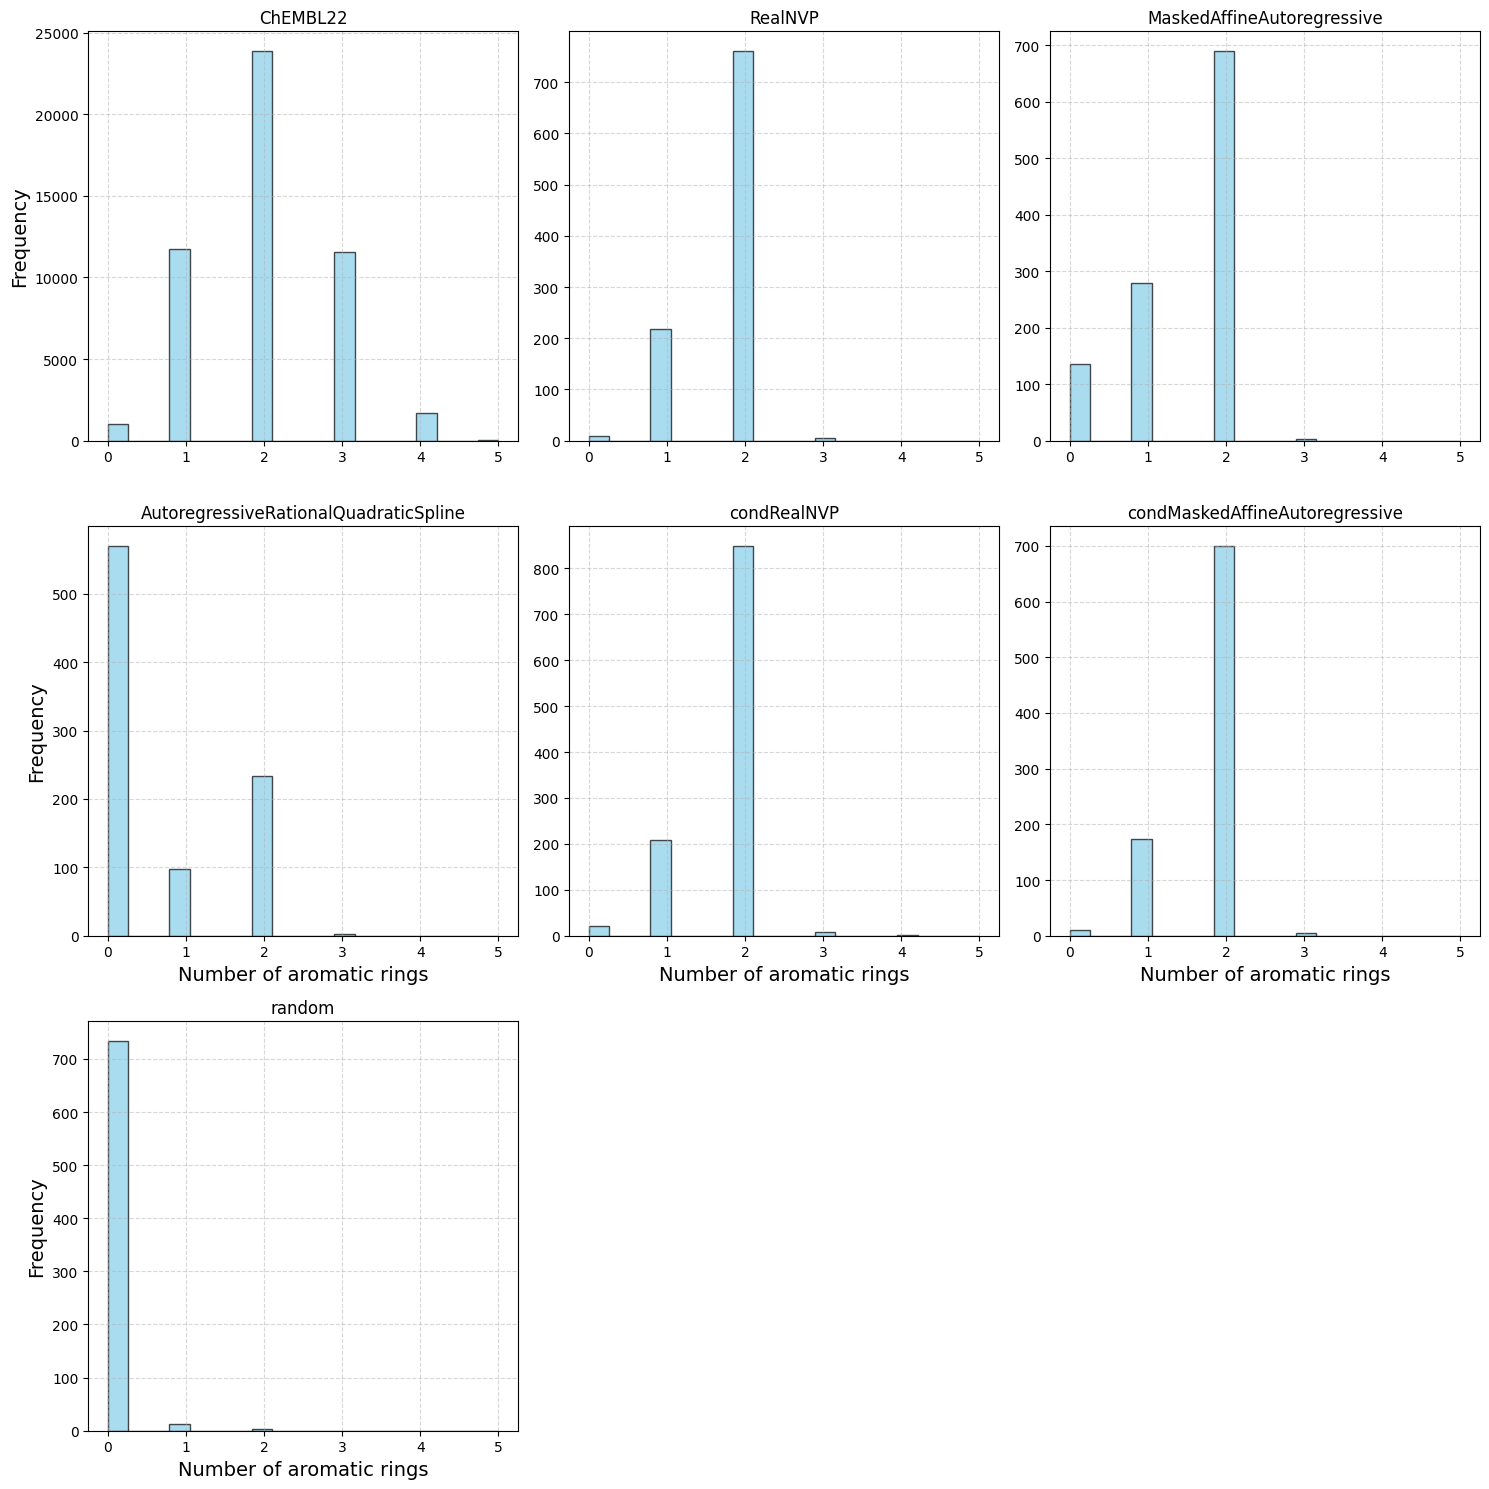

In [24]:
# Get Heavy_atoms min and max values from ChEMBL22 for consistent axis
chEMBL22_Heavy_atoms_values = flow_data_dict['ChEMBL22']['aromatic']
Heavy_atoms_min = chEMBL22_Heavy_atoms_values.min()
Heavy_atoms_max = chEMBL22_Heavy_atoms_values.max()

print(f"ChEMBL22 Heavy_atoms min: {Heavy_atoms_min}, Heavy_atoms max: {Heavy_atoms_max}")

# Plot the histograms in a grid
num_flows = len(flow_data_dict)
columns = 3  # Adjust the number of columns you want in the grid
rows = (num_flows + columns - 1) // columns  # Calculate the number of rows needed

fig, axes = plt.subplots(rows, columns, figsize=(15, rows * 5))  # Adjust size as needed
axes = axes.flatten()  # Flatten axes array for easy indexing

# Define bin edges based on the min and max Heavy_atoms values from ChEMBL22
num_bins = 20  # You can adjust this number based on the granularity you want
#bins = np.linspace(Heavy_atoms_min, Heavy_atoms_max, num_bins)
bins = np.linspace(0, 5, num_bins)

# Loop over all flows and plot their histograms in the grid
for i, (flow_name, flow_data) in enumerate(flow_data_dict.items()):
    Heavy_atoms_values = flow_data['aromatic'].dropna()

    axes[i].hist(Heavy_atoms_values, bins=bins, alpha=0.7, edgecolor='black', color='skyblue')
    axes[i].grid(True, linestyle='--', alpha=0.5)
    axes[i].set_title(f"{flow_name}") #, {len(flow_data['aromatic'])}, {(flow_data['aromatic'].dropna() > 0).sum()}", fontsize=12)
    axes[i].set_xlabel("Number of aromatic rings", fontsize=14)
    if i == 0 or i == 1 or i == 2:
        axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency", fontsize=14)
    if i == 1 or i == 2 or i == 4 or i == 5:
        axes[i].set_ylabel("")
    axes[i].grid(True)

# Hide any unused subplots if there are fewer flows than the number of axes
for i in range(num_flows, len(axes)):
    axes[i].axis('off')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the histogram grid plot
# Save the plot with high dpi for publication quality
# plt.savefig('Heavy_atoms_histograms_kde_plot_publication.png', dpi=300, bbox_inches='tight')
plt.show()

# LogP

In [11]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for KDE
import numpy as np
import rdkit.Chem.Lipinski as Lipinski
import rdkit.Chem.Descriptors


# Path and extension setup
path = ''
extension = 'csv'
all_csv = glob.glob('*.{}'.format(extension))

# Clean the filenames to get the names of flows
all_flows = ['ChEMBL22', 'RealNVP',  'MaskedAffineAutoregressive', 'AutoregressiveRationalQuadraticSpline', 'condRealNVP', 'condMaskedAffineAutoregressive', 'random']

print("Flows:", all_flows)

# Initialize a dictionary to store flow names as keys and their corresponding data as values
flow_data_dict = {}

# Loop over all flows (including ChEMBL22)
for flow in all_flows:
    print(f"Processing {flow}...")
    if flow == 'ChEMBL22' or flow == 'random':  # Special case for ChEMBL22
        flow_data = pd.read_csv(str(flow)+'.csv')  # Make sure the file name matches
        flow_data_dict[flow] = flow_data  # No filtering for ChEMBL22
    else:
        flow_data = pd.read_csv('1_' + str(flow) + '-4-32.csv')
        # Store the flow data in the dictionary with the flow name as the key
        flow_data_dict[flow] = flow_data[flow_data['Origin'] == '1_iter']
    for index, row in flow_data_dict[flow].iterrows():
        try:
            mol = Chem.MolFromSmiles(row['Original_SMILES'])#+'OP(C)(=O)F')
            MolLogP = rdkit.Chem.Descriptors.MolLogP(mol)
        except:
            MolLogP = np.nan
        
        flow_data_dict[flow].at[index, "MolLogP"] = MolLogP

Flows: ['ChEMBL22', 'RealNVP', 'MaskedAffineAutoregressive', 'AutoregressiveRationalQuadraticSpline', 'condRealNVP', 'condMaskedAffineAutoregressive', 'random']
Processing ChEMBL22...


[14:27:39] Explicit valence for atom # 14 N, 4, is greater than permitted


Processing RealNVP...


/tmp/ipykernel_1906336/10467366.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_data_dict[flow].at[index, "MolLogP"] = MolLogP


Processing MaskedAffineAutoregressive...


/tmp/ipykernel_1906336/10467366.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_data_dict[flow].at[index, "MolLogP"] = MolLogP


Processing AutoregressiveRationalQuadraticSpline...


/tmp/ipykernel_1906336/10467366.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_data_dict[flow].at[index, "MolLogP"] = MolLogP


Processing condRealNVP...


/tmp/ipykernel_1906336/10467366.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_data_dict[flow].at[index, "MolLogP"] = MolLogP


Processing condMaskedAffineAutoregressive...


/tmp/ipykernel_1906336/10467366.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flow_data_dict[flow].at[index, "MolLogP"] = MolLogP


Processing random...


[14:27:53] WARNING: not removing hydrogen atom without neighbors


In [14]:
flow_data_dict['random']

,Original_SMILES,QED,SA_score,Origin,MolLogP
0,CCCl,0.371986,2.381334,1st_iter,1.2451
1,SBr,0.448418,4.954876,1st_iter,1.2261
2,O,0.327748,5.868477,1st_iter,-0.8247
3,CO,0.385284,2.701045,1st_iter,-0.3915
4,CNN,0.273315,2.973188,1st_iter,-0.9205
...,...,...,...,...,...
747,CNNNOOOO,0.201628,4.843223,1st_iter,-1.5172
748,CCCCCCCCCCC(=C(NC)NCCCCCCCCCCCCCCCCCCCCC)C,0.088778,2.416139,1st_iter,11.9895
749,c1c=I1I,0.589846,7.833565,1st_iter,1.5035
750,C CCCCCCCCCCCCCCCCHH)CCCC))))CHHH))))))HH])))...,0.359785,7.328415,1st_iter,0.6361


ChEMBL22 Heavy_atoms min: -4.9017, Heavy_atoms max: 6.069220000000003


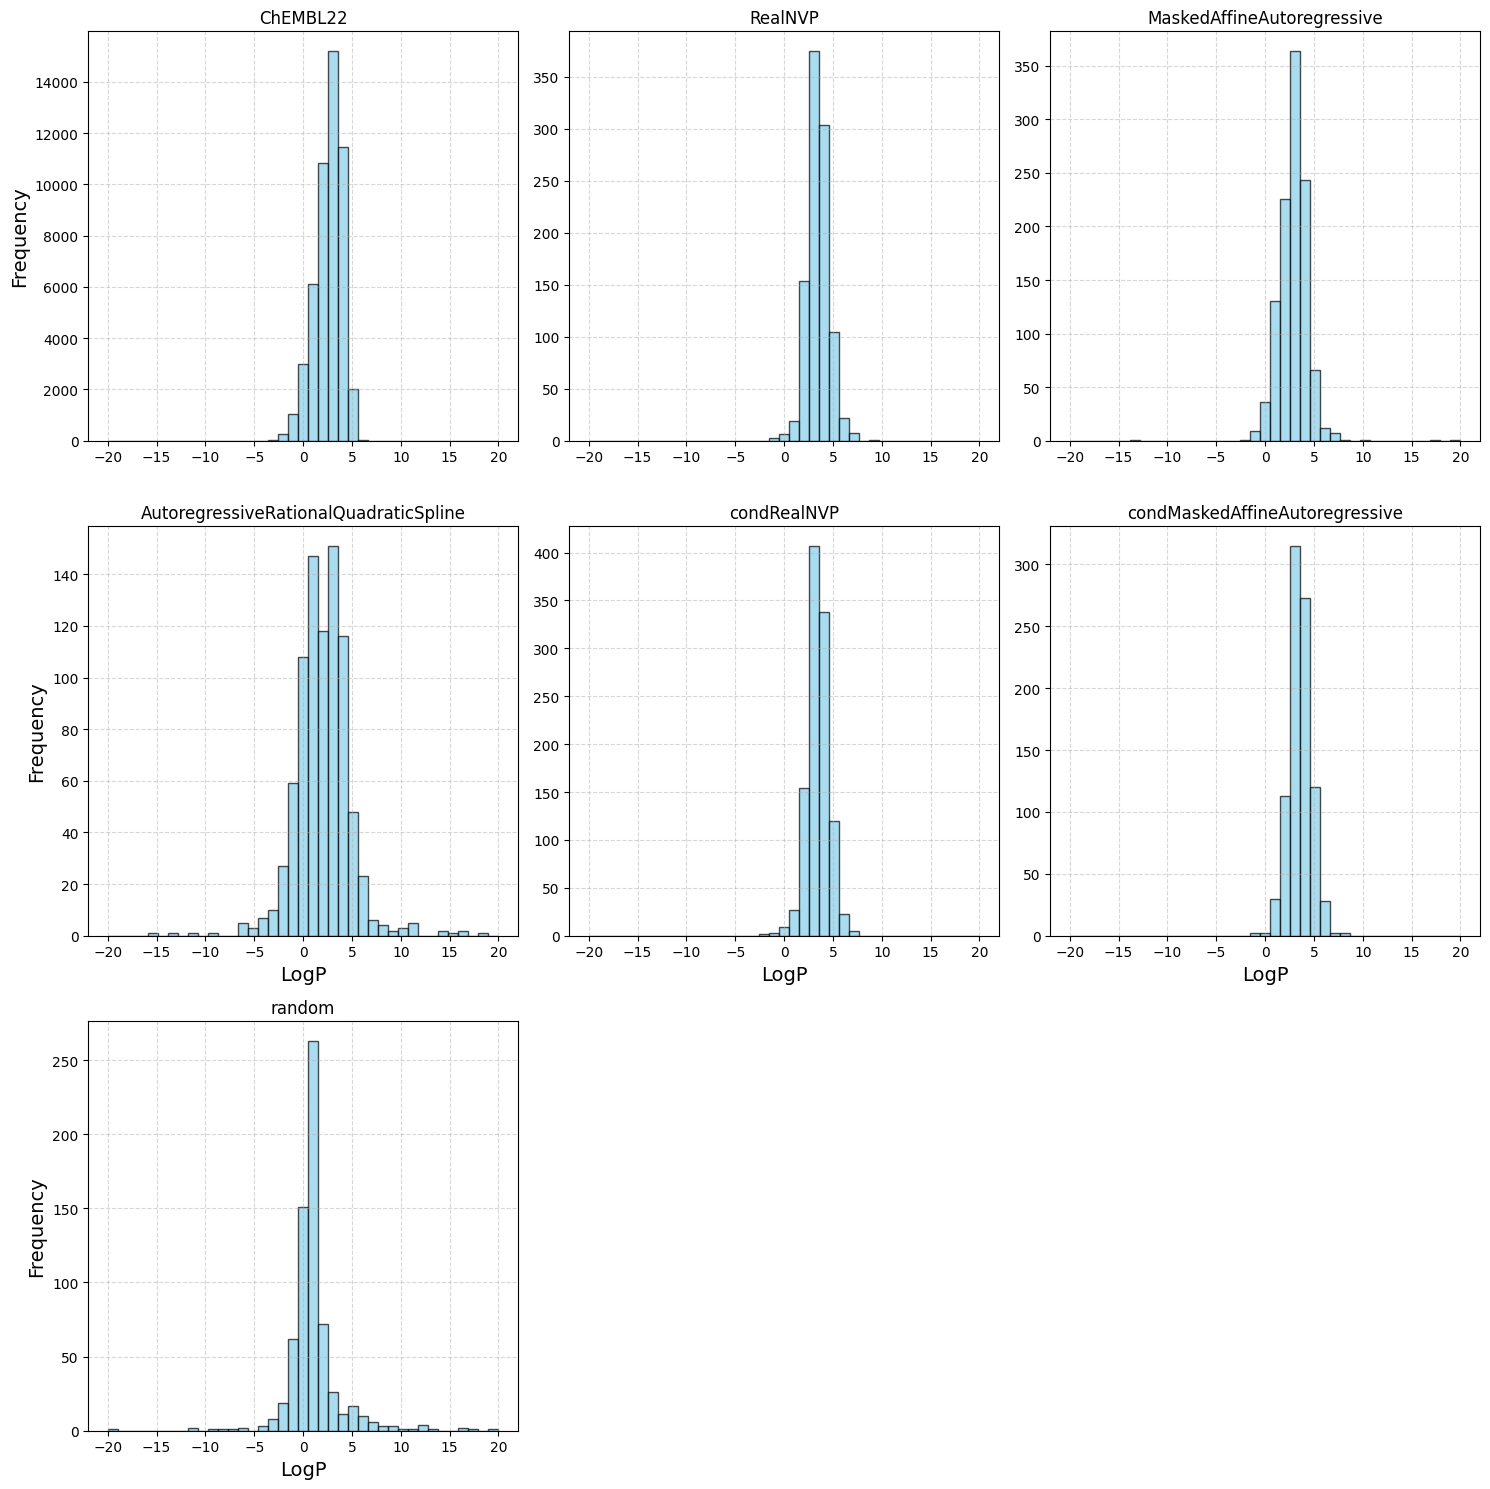

In [20]:
# Get Heavy_atoms min and max values from ChEMBL22 for consistent axis
chEMBL22_Heavy_atoms_values = flow_data_dict['ChEMBL22']['MolLogP']
Heavy_atoms_min = chEMBL22_Heavy_atoms_values.min()
Heavy_atoms_max = chEMBL22_Heavy_atoms_values.max()

print(f"ChEMBL22 Heavy_atoms min: {Heavy_atoms_min}, Heavy_atoms max: {Heavy_atoms_max}")

# Plot the histograms in a grid
num_flows = len(flow_data_dict)
columns = 3  # Adjust the number of columns you want in the grid
rows = (num_flows + columns - 1) // columns  # Calculate the number of rows needed

fig, axes = plt.subplots(rows, columns, figsize=(15, rows * 5))  # Adjust size as needed
axes = axes.flatten()  # Flatten axes array for easy indexing

# Define bin edges based on the min and max Heavy_atoms values from ChEMBL22
num_bins = 40  # You can adjust this number based on the granularity you want
#bins = np.linspace(Heavy_atoms_min, Heavy_atoms_max, num_bins)
bins = np.linspace(-20, 20, num_bins)

# Loop over all flows and plot their histograms in the grid
for i, (flow_name, flow_data) in enumerate(flow_data_dict.items()):
    Heavy_atoms_values = flow_data['MolLogP'].dropna()

    axes[i].hist(Heavy_atoms_values, bins=bins, alpha=0.7, edgecolor='black', color='skyblue')
    axes[i].grid(True, linestyle='--', alpha=0.5)
    axes[i].set_title(f"{flow_name}") #, {len(flow_data['MolLogP'])}, {(flow_data['MolLogP'].dropna() > 0).sum()}", fontsize=12)
    axes[i].set_xlabel("LogP", fontsize=14)
    if i == 0 or i == 1 or i == 2:
        axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency", fontsize=14)
    if i == 1 or i == 2 or i == 4 or i == 5:
        axes[i].set_ylabel("")
    axes[i].grid(True)

# Hide any unused subplots if there are fewer flows than the number of axes
for i in range(num_flows, len(axes)):
    axes[i].axis('off')

# Adjust layout to prevent overlapping labels
plt.tight_layout()

# Show the histogram grid plot
# Save the plot with high dpi for publication quality
# plt.savefig('Heavy_atoms_histograms_kde_plot_publication.png', dpi=300, bbox_inches='tight')
plt.show()

# Larger comparison

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for KDE
import numpy as np

In [40]:
path = ''
extension = 'csv'
all_csv = glob.glob('*.{}'.format(extension))

# Clean the filenames to get the names of flows
all_flows = ['ChEMBL22', 'ChemBL-35-cleaned', 'smiles_1_4_32_all', 'smiles_filtered_1_4_32_all']

print("Flows:", all_flows)

# Initialize a dictionary to store flow names as keys and their corresponding data as values
flow_data_dict = {}

# Loop over all flows (including ChEMBL22)
for flow in all_flows:
    print(f"Processing {flow}...")
    if flow == 'ChEMBL22' or flow == 'ChemBL-35-cleaned' or flow == 'random':  # Special case for ChEMBL22
        flow_data = pd.read_csv(str(flow)+'.csv')  # Make sure the file name matches
        flow_data_dict[flow] = flow_data  # No filtering for ChEMBL22
    else:
        flow_data = pd.read_csv(str(flow)+'.csv')
        # Store the flow data in the dictionary with the flow name as the key
        flow_data_dict[flow] = flow_data[flow_data['Origin'] == '1_iter']

for flow in all_flows:
    if flow == 'ChEMBL22' or flow == 'ChemBL-35-cleaned':
        print('')
    else:
        # Getting rid of samples present in the CheMBL22 - 50k or ChemBL 35 datasets:
        df = pd.merge(flow_data_dict[flow], flow_data_dict['ChEMBL22'], on = ['Original_SMILES'], how = 'left', indicator=True)
        df = df[df['_merge'] == 'left_only'].drop(columns=['_merge'])
        flow_data_dict[flow] = df

        df = pd.merge(flow_data_dict[flow], flow_data_dict['ChemBL-35-cleaned'], on = ['Original_SMILES'], how = 'left', indicator=True)
        df = df[df['_merge'] == 'left_only'].drop(columns=['_merge'])
        flow_data_dict[flow] = df

Flows: ['ChEMBL22', 'ChemBL-35-cleaned', 'smiles_1_4_32_all', 'smiles_filtered_1_4_32_all']
Processing ChEMBL22...
Processing ChemBL-35-cleaned...
Processing smiles_1_4_32_all...
Processing smiles_filtered_1_4_32_all...




In [42]:
# Renaming it
flow_data_dict['smiles_1_4_32_all'] = flow_data_dict['smiles_1_4_32_all'].dropna(axis='columns').rename(columns={"QED_x": "QED", "SA_score_x": "SA_score"})
flow_data_dict['smiles_filtered_1_4_32_all'] = flow_data_dict['smiles_filtered_1_4_32_all'].dropna(axis='columns').rename(columns={"QED_x": "QED", "SA_score_x": "SA_score"})

flow_data_dict['smiles_1_4_32_all'] = flow_data_dict['smiles_1_4_32_all'].head(250000)
flow_data_dict['smiles_1_4_32_all-top50k'] = flow_data_dict['smiles_1_4_32_all'].head(50000)
flow_data_dict['smiles_filtered_1_4_32_all'] = flow_data_dict['smiles_filtered_1_4_32_all'].head(840000)

In [43]:
for datas in ['ChemBL-35-cleaned', 'ChEMBL22', 'smiles_1_4_32_all-top50k', 'smiles_1_4_32_all', 'smiles_filtered_1_4_32_all']:
    print(datas)
    threshold = int(len(flow_data_dict[datas]) * 0.001)
    print(threshold)
    flow_data_dict[datas] = flow_data_dict[datas].sort_values(['QED'], ascending=False).head(threshold)

ChemBL-35-cleaned
2376
ChEMBL22
50
smiles_1_4_32_all-top50k
50
smiles_1_4_32_all
250
smiles_filtered_1_4_32_all
837


In [50]:
data = {
#    'ChEMBL35': flow_data_dict['ChemBL-35-cleaned']['QED'],
    'ChEMBL22 50k': flow_data_dict['ChEMBL22']['QED'],
    'RealNVP 50k': flow_data_dict['smiles_1_4_32_all-top50k']['QED'],
    'RealNVP 250k': flow_data_dict['smiles_1_4_32_all']['QED'],
    'RealNVP 837k': flow_data_dict['smiles_filtered_1_4_32_all']['QED'],
#    'Real NVP best': flow_data_dict['smiles_1_4_32_all']['QED'].head(500)
}

df = pd.DataFrame(data)

In [51]:
df.describe()

,ChEMBL22 50k,RealNVP 50k,RealNVP 250k,RealNVP 837k
count,50.000000,50.000000,250.000000,837.000000
mean,0.947253,0.947325,0.947248,0.947029
std,0.000443,0.000404,0.000478,0.000561
min,0.946531,0.946859,0.946628,0.946285
25%,0.946879,0.946982,0.946859,0.946563
50%,0.947162,0.947133,0.947018,0.946895
75%,0.947513,0.947736,0.947642,0.947455
max,0.948123,0.948156,0.948381,0.948432


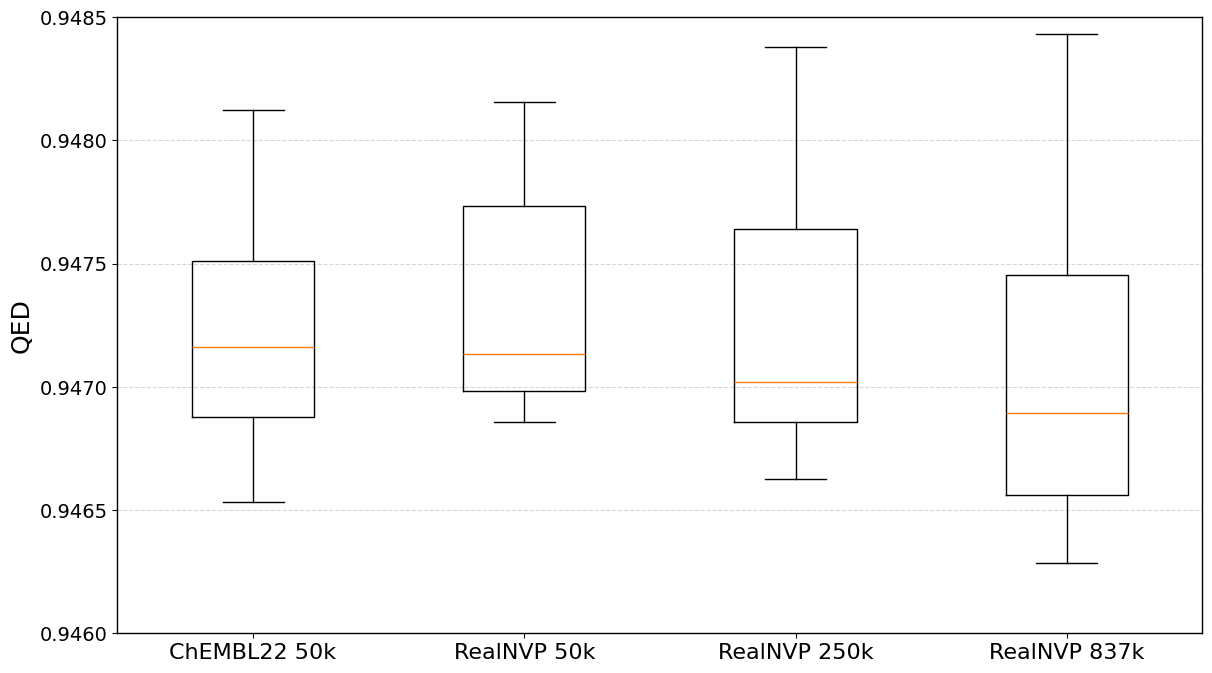

In [54]:
import matplotlib.pyplot as plt

# Assuming df is your dataframe with potential missing values

fig, ax = plt.subplots(figsize=(14, 8))

# Handle NaN values by removing them for the boxplot
ax.boxplot([df[col].dropna() for col in df.columns])

# Set the spines (borders of the plot) to a darker color
for spine in ax.spines.values():
    spine.set_edgecolor('black')  # Dark black border for the plot
    spine.set_linewidth(1)  # Make the spine lines thicker

# Set labels
ax.set_ylabel("QED", fontsize=18)

# Optionally, add gridlines
plt.grid(False)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Adjust x-tick labels to show column names
plt.xticks(range(1, len(df.columns) + 1), df.columns, fontsize=16)
plt.yticks(fontsize=14)

# If needed, set y-limits
ax.set_ylim(0.946, 0.94850)

# Adjust layout for better spacing
#plt.tight_layout()

# Show the plot
plt.show()


In [263]:
examples = flow_data_dict['smiles_1_4_32_all'][flow_data_dict['smiles_1_4_32_all']['QED'] > max(flow_data_dict['ChEMBL22']['QED'])].sort_values(['QED'], ascending=True)

In [264]:
new = []
new.append('CN(C)C(=O)c1c2c(sc1NC(=O)c3ccco3)CCC2')

for listed in list(examples['Original_SMILES']):
    new.append(listed)
new

['CN(C)C(=O)c1c2c(sc1NC(=O)c3ccco3)CCC2',
 'Cc1cccc(c1)NC(=O)[C@H]2CC(=O)N(O2)c3cccs3',
 'Cc1ccc(cc1)NC(=O)[C@H]2CC(=O)N(O2)c3cccs3',
 'c1ccc(c(c1)NS(=O)(=O)c2ccco2)Br',
 'c1ccc(c(c1)S(=O)(=O)Nc2ccco2)Br',
 'c1cc(nc(n1)C(=O)NCc2ccc(s2)C)C(F)(F)F',
 'Cc1c(snn1)C(=O)NCc2ccc(cc2)C(F)(F)F',
 'c1cc(sc1)N2CCC(CCC2CC(=O)N3cccc3)N',
 'COc1ccc(cc1C(=O)N[C@H]2CC(=O)c3ccccc3C2)C',
 'Cc1ccccc1C(=O)NC2C(N(CC2)c3ccccc3)C#N',
 'Cc1c(cc(nn1)NC(=O)C(c2ccc(cc2)))Br',
 'Cc1ccnc(n1)NC(=O)Cc2ccccc2Br',
 'Cc1ccnc(n1)NC(=O)Cc2ccc(cc2)Br',
 'Cc1ccnc(n1)CC(=O)Nc2ccccc2Br']

In [294]:
new_qed = []
new_qed.append(round(0.948123, 7))

for listed in list(examples['QED']):
    new_qed.append(round(listed, 7))
new_qed

[0.948123,
 0.9481257,
 0.9481257,
 0.948126,
 0.948126,
 0.9481557,
 0.9481557,
 0.9481618,
 0.9481831,
 0.9483563,
 0.9483813,
 0.9483813,
 0.9483813,
 0.9483813]

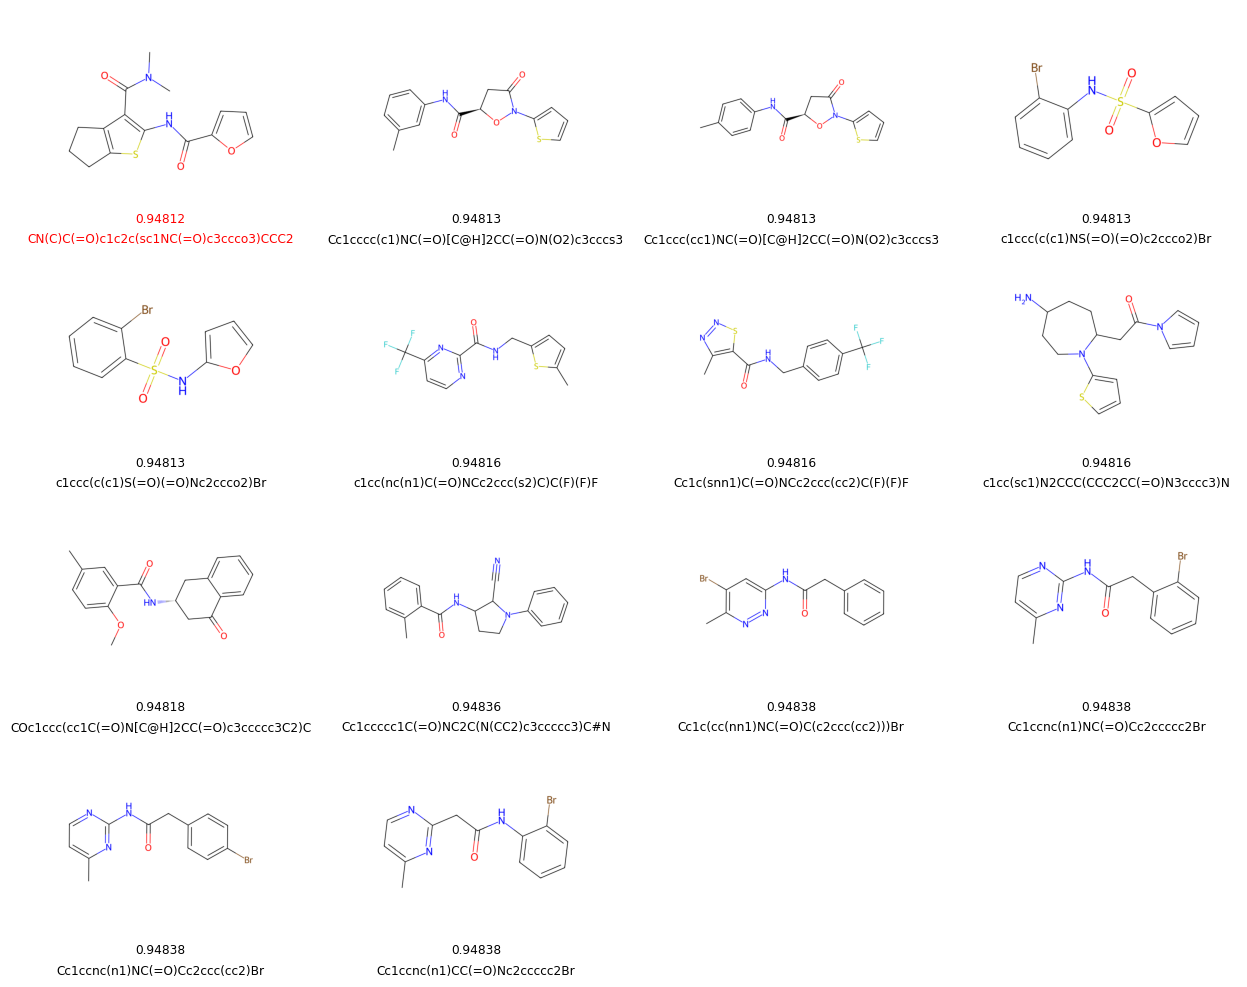

In [289]:
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import Draw

# List of 14 SMILES strings (replace 'new' with your actual SMILES list)
smiles_list = new

# Convert SMILES to RDKit molecules
molecules = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

# Plot the molecules in a grid
num_molecules = len(molecules)
columns = 4  # Number of columns in the grid (adjusted for 14 molecules)
rows = (num_molecules + columns - 1) // columns  # Calculate number of rows

# Create the figure and axes for the grid layout
fig, axes = plt.subplots(rows, columns, figsize=(13, rows * 2.5))  # Reduced vertical size

# Flatten axes array for easy indexing
axes = axes.flatten()

# Draw each molecule on a separate axis and add annotation
for i, mol in enumerate(molecules):
    # Draw the molecule on the i-th subplot axis
    img = Draw.MolToImage(mol, size=(600, 600))
    axes[i].imshow(img)
    axes[i].axis('off')  # Hide axes to make the plot cleaner

    # Add the SMILES string as an annotation below each molecule
    if i == 0:
        axes[i].text(0.5, -0.1, smiles_list[i], ha='center', va='top', fontsize=8.75, color='red', transform=axes[i].transAxes)
        axes[i].text(0.5, 0, new_qed[i], ha='center', va='top', fontsize=8.75, color='red', transform=axes[i].transAxes)
    else:
        axes[i].text(0.5, -0.1, smiles_list[i], ha='center', va='top', fontsize=8.75, color='black', transform=axes[i].transAxes)
        axes[i].text(0.5, 0, new_qed[i], ha='center', va='top', fontsize=8.75, color='black', transform=axes[i].transAxes)

# Hide any unused subplots if there are fewer molecules than axes
for i in range(num_molecules, len(axes)):
    axes[i].axis('off')

# Adjust layout to prevent overlapping labels and make the plot more readable
plt.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.2)  # Adjust vertical and horizontal spacing

# Show the plot
plt.show()

In [293]:
pd.read_csv('ChemBL-35-cleaned.csv').sort_values(['QED'], ascending=False)

,Unnamed: 0,Original_SMILES,QED,SA_score
1022157,1071884,C[C@H]1Cc2cc(C(=O)NCc3cnc4c(c3)CCC4)ccc2O1,0.948369,2.748378
1000834,1050514,CCc1cnccc1C(=O)NC1CC12CCOc1ccccc12,0.948347,3.882271
1428821,1486679,N=C1SCC(=O)N1c1ncc(Cc2ccc(F)cc2)s1,0.948329,2.721705
2244946,2334115,Cc1c(Cl)cccc1CNC(=O)C1COc2ncccc21,0.948299,2.968532
271200,280181,CN(C)CCC(=O)N1c2ccccc2NC(=O)c2ccccc21,0.948289,2.226372
...,...,...,...,...
926935,973934,COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCCOCCNC(=O)C(...,0.007947,5.047993
2177604,2264084,CCCCC(OC(=O)CN1CCN(CCCCCOc2ccc(-c3cc(=S)ss3)cc...,0.007744,4.197169
2177605,2264085,CCCCC(OC(=O)CN1CCN(CCCCCCOc2ccc(-c3cc(=S)ss3)c...,0.007401,4.224856
781495,816190,CCCCCCCC/C=C/CCCCCCCC(=O)OCC(COP(=O)(O)O)OC(=O...,0.006844,4.102852
